Design 4 chips for 4 different Lk (12, 24, 232, 61)pH/sq

In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [3]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


# 12pH/sq resonators


CPW

In [60]:
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 49.63979337993569 Ohm
Frequency of the feedline is 2.0455031629048253 GHz


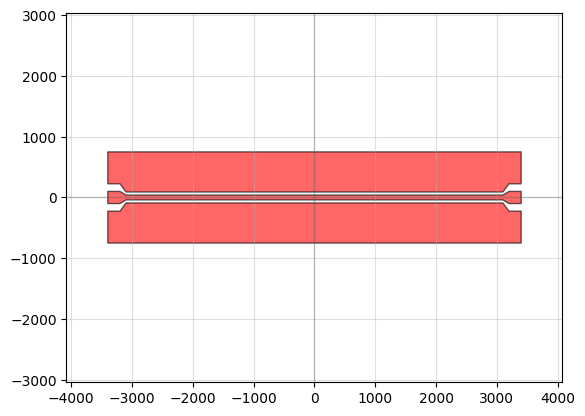

In [61]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
# TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\Tline-tests\20240527-SiRes-12pHsq-Tline-v1.gds")


Last Resonator (lowest freq)


Inductor total length is [1580.]
Resonator 1
 Lg: 33.17636369210266 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
The frequencies are [4.476755400055545]


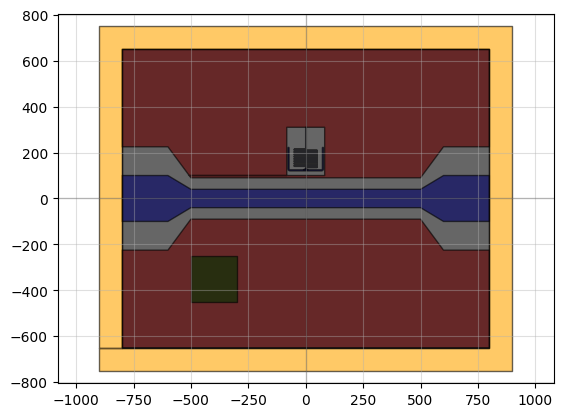

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-SiRes-LastRes-12pHsq_v1.gds'

In [24]:
# Last resonator 12pH/sq, lowest frequency
SeparationTlineResonator12 = [10]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([90])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        


print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80

ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-LastRes-12pHsq_v1.gds")


First Resonator (higher freq)

Inductor total length is [435.]
Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
The frequencies are [8.52997635913335]


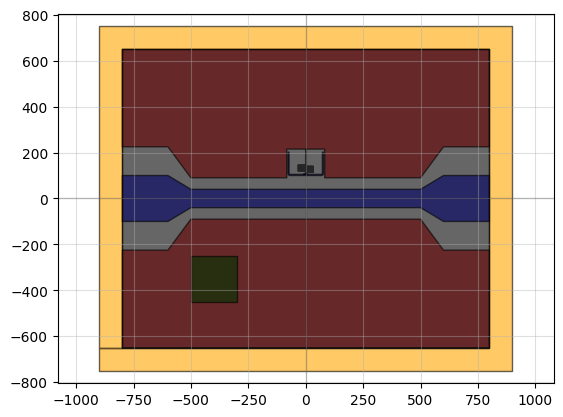

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-SiRes-FirstRes-12pHsq_v1.gds'

In [26]:
# 12pH/sq first resonator. Making the resonator shorter to increase the frequency
SeparationTlineResonator12 = [0]
NumberOfResonators12 = 1

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
print('Inductor total length is', InductorTotalLength12)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1300]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-SiRes-FirstRes-12pHsq_v1.gds")


Full chip

Resonator 1
 Lg: 9.135461097353812 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 2
 Lg: 10.017310799519272 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 3
 Lg: 11.02513903056551 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 4
 Lg: 12.032967261611748 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20312982663676243 fF
Resonator 5
 Lg: 13.229763285979159 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 6
 Lg: 14.909477004389561 nH
 Cg: 37.89856914206288 fF
 Cc: 0.1979018818407487 fF
Resonator 7
 Lg: 16.58919072279996 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 8
 Lg: 18.75182213525335 nH
 Cg: 37.89856914206288 fF
 Cc: 0.19125256049954506 fF
Resonator 9
 Lg: 21.20840344842856 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20925353565232202 fF
Resonator 10
 Lg: 24.25288456304741 nH
 Cg: 37.89856914206288 fF
 Cc: 0.20606071606065215 fF
Resonator 11
 Lg: 28.767115181275358 nH
 Cg: 37.89856914206288 fF
 Cc: 0.209

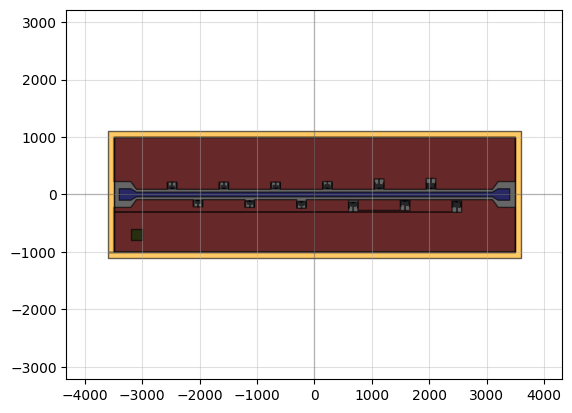

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240514-SiRes-12pHsq-v1.gds'

In [28]:
# We take as reference the first (v3) and last resonator (v2) and put resonators in between
# Fabrication version: We call it v0

# 12pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 12

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[5, 6, 7, 6, 7, 8, 9, 9, 10, 11, 12, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[66, 62, 60, 78, 75, 75, 75, 82, 85, 90, 100, 100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*([60] + [55,50,55] + [50]*3 + [90]*5)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_12,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = 200*50/80
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12)

qp(chip12)
chip12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240514-SiRes-12pHsq-v1.gds")


# 24pH/sq resonators

CPW

In [5]:
FeedlineWidth24 = 50.1
FeedlineLength24  = 6200
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*FeedlineGap24/FeedlineWidth24

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')

In [ ]:
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, 1500]

_, _, TLine24 = ChipTline(ChipSize24,
                          FeedlineWidth24, 
                          FeedlineLength24, 
                          FeedlineGap24, 
                          FeedlineTaperLength24, 
                          BondpadWidth24, 
                          BondpadLength24, 
                          BondpadGap24)
qp(TLine24)
TLine24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-SiRes-24pHsq-Tline-v1.gds")


First Resonator (higher freq)

Resonator 1
 Lg: 9.226212586526513 nH
 Cg: 37.89856914206288 fF
 Cc: 0.26817437098247215 fF
The frequencies are [8.481366877497065]


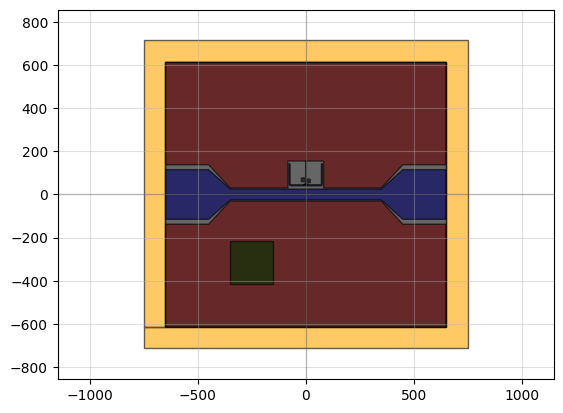

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240604-FirstRes-24pHsq_v1.gds'

In [28]:
SeparationTlineResonator24 = [0]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([70])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[10]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-FirstRes-24pHsq_v1.gds")


Last Resonator (lowest freq)

Resonator 1
The frequencies are [4.353561494801278]


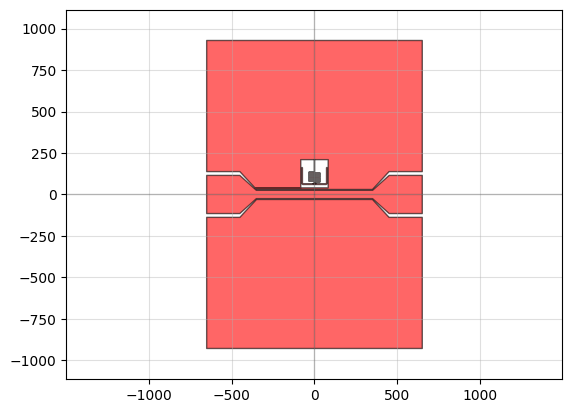

In [52]:
SeparationTlineResonator24 = [10]
NumberOfResonators24 = 1

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[65] 
InductorEndLength24 = np.ones(NumberOfResonators24)*([65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24

InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[20]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

FeedlineLength24 = 700
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, np.max(InductorTotalLength24) + 20*FeedlineWidth24]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24, MWO_simulation=True)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-LastRes-24pHsq_v1.gds")


Full chip

Inductor total length is [225. 244. 269. 300. 334. 370. 420. 470. 534. 610. 720. 855.]
The frequencies are [8.481366877497065, 8.14452749416033, 7.756909719797515, 7.347772991428007, 6.961444645553439, 6.617752108287567, 6.208040100820938, 5.872944835754061, 5.505717984749264, 5.1523735777587465, 4.741584693505212, 4.353561494801278]


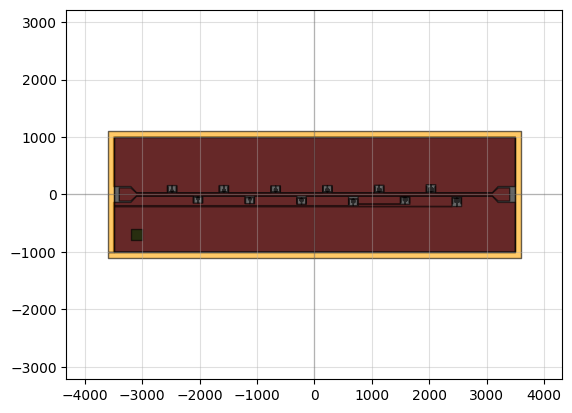

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240604-SiRes-24pHsq-v1.gds'

In [50]:
SeparationTlineResonator24 = [0]*7 + [5,0,10,0,10]
NumberOfResonators24 = 12

#Resonator parameters
CapacitorHorizontalLength24 = np.ones(NumberOfResonators24)*150
CapacitorVerticalLength24 = np.ones(NumberOfResonators24)*100
CapacitorWidth24 = np.ones(NumberOfResonators24)*5

NumberOfBends24 = np.ones(NumberOfResonators24, dtype=int)*[3, 4, 4, 5, 6, 6,7,8,8,9,10,11]# 8, 9, 9, 10, 11, 12, 11]
InductorVerticalLength24 = np.ones(NumberOfResonators24)*5
InductorHorizontalLength24 = np.ones(NumberOfResonators24)*[40, 36, 41, 40, 39, 45, 45, 45, 53, 55, 60, 65]
InductorEndLength24 = np.ones(NumberOfResonators24)*([70] + [60,65,55] + [50]*7 +[65])
InductorTotalLength24 = InductorVerticalLength24*(NumberOfBends24+4) + InductorEndLength24 +InductorHorizontalLength24*NumberOfBends24
InductorWidth24 = np.ones(NumberOfResonators24)*0.6
TaperWidth24 = np.ones(NumberOfResonators24)*20

SpacingC024 = np.ones(NumberOfResonators24)*5
SpacingCc24 = np.ones(NumberOfResonators24)*[10,10,10,20,10,30,10,40,10,5,10,20]
TaperLength24 = np.ones(NumberOfResonators24)*5
FinalSpacingBondpads24 = 100

freqs = []
for i in range(NumberOfResonators24):
    # print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth24[i]*1e-6, CapacitorWidth24[i]*1e-6, (SeparationTlineResonator24[i] + FeedlineGap24 + SpacingCc24[i])*1e-6 , FeedlineWidth24*1e-6,
                                            CapacitorVerticalLength24[i]*1e-6, SpacingC024[i]*1e-6,
                                            InductorWidth24[i]*1e-6, InductorTotalLength24[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)

print('Inductor total length is', InductorTotalLength24)
print('The frequencies are', freqs)

FeedlineLength24  = 6200
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24 + 2*FinalSpacingBondpads24, 2000]

c, metal, chip24 = ChipResonatorsTline(ChipSize24, NumberOfResonators24, SeparationTlineResonator24,
                        FeedlineWidth24, FeedlineLength24, FeedlineGap24, 
                        FeedlineTaperLength24, BondpadWidth24, BondpadLength24, BondpadGap24,
                        CapacitorHorizontalLength24, CapacitorVerticalLength24, CapacitorWidth24,
                        NumberOfBends24, InductorVerticalLength24, InductorHorizontalLength24, InductorWidth24, InductorEndLength24,
                        TaperWidth24, TaperLength24, SpacingC024, SpacingCc24,
                        FinalSpacingBondpads24)

qp(chip24)
chip24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-SiRes-24pHsq-v1.gds")

# 232pH/sq resonators

CPW

In [55]:
# 232pH/sq
FeedlineWidth232 = 330
FeedlineLength232  = 5700
FeedlineGap232 = 5
FeedlineTaperLength232 =  100
BondpadWidth232 =  450
BondpadLength232 = 100
BondpadGap232 = BondpadWidth232*FeedlineGap232/FeedlineWidth232

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232, length_CPW=(FeedlineLength232 + FeedlineTaperLength232 + BondpadLength232)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.09872776388761 Ohm
Frequency of the feedline is 1.553664021071492 GHz


# 61pH/sq resonators

CPW

In [5]:
# 61pH/sq on Ge!!
FeedlineWidth61 = 87
FeedlineLength61  = 5700
FeedlineGap61 = 5
FeedlineTaperLength61 =  100
BondpadWidth61 =  184
BondpadLength61 = 100
BondpadGap61 = BondpadWidth61*FeedlineGap61/FeedlineWidth61

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth61*1e-6, FeedlineGap61*1e-6, epsilon_r_Ge, thickness_subs_Ge, ind_kin_sq=Lk_61, length_CPW=(FeedlineLength61 + FeedlineTaperLength61 + BondpadLength61)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.08723025799379 Ohm
Frequency of the feedline is 1.4643198563285849 GHz


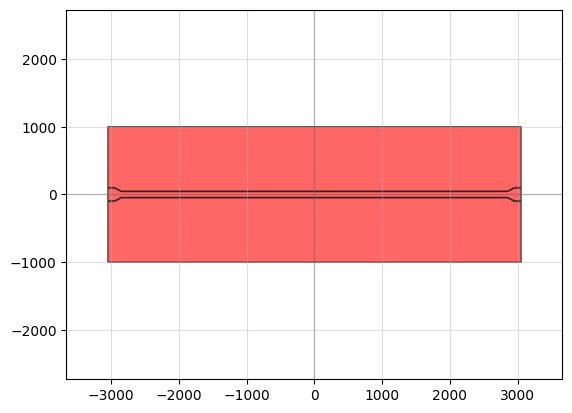

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-GeRes-61pHsq\\20240610-GeRes-61pHsq-Tline-v1.gds'

In [6]:
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, 2000]

_, _, TLine61 = ChipTline(ChipSize61,
                            FeedlineWidth61, 
                            FeedlineLength61, 
                            FeedlineGap61, 
                            FeedlineTaperLength61, 
                            BondpadWidth61, 
                            BondpadLength61, 
                            BondpadGap61)

qp(TLine61)
TLine61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-GeRes-61pHsq\20240610-GeRes-61pHsq-Tline-v1.gds")


First Resonator (higher freq)

Resonator 1
The frequencies are [9.382116323396838]


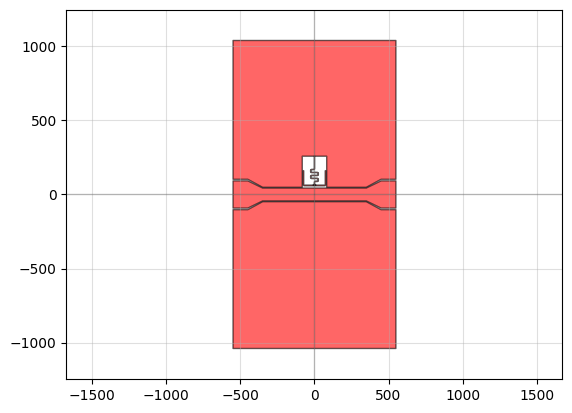

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-GeRes-61pHsq\\20240610-FirstRes-61pHsq_v1.gds'

In [23]:
SeparationTlineResonator61 = [0]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[3]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([50])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*NumberOfBends61

InductorWidth61 = np.ones(NumberOfResonators61)*2.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[10]
TaperLength61 = np.ones(NumberOfResonators61)*5
FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Ge, thickness_subs_Ge)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-GeRes-61pHsq\20240610-FirstRes-61pHsq_v1.gds")





Last Resonator (Lowest frequency)

Resonator 1
The frequencies are [4.826592832829205]


c:\Users\LocalAdmin\Documents\GitHub\resonators\Schuster_Resonators\approx_Schuster.py:59: RuntimeWarning: overflow encountered in exp
  den = np.exp(np.pi*(w+s)/h) -1


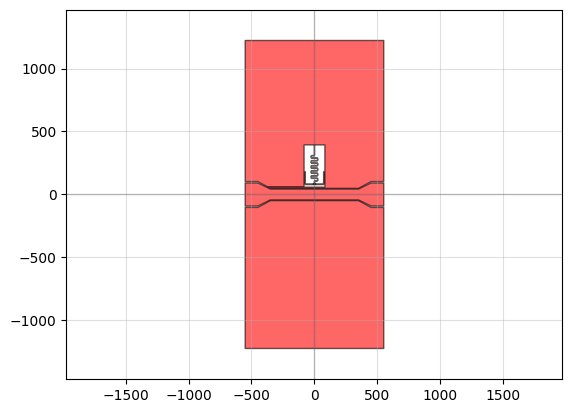

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-GeRes-61pHsq\\20240610-LastRes-61pHsq_v1.gds'

In [31]:
SeparationTlineResonator61 = [10]
NumberOfResonators61 = 1

#Resonator parameters
CapacitorHorizontalLength61 = np.ones(NumberOfResonators61)*150
CapacitorVerticalLength61 = np.ones(NumberOfResonators61)*100
CapacitorWidth61 = np.ones(NumberOfResonators61)*5

NumberOfBends61 = np.ones(NumberOfResonators61, dtype=int)*[8]
InductorVerticalLength61 = np.ones(NumberOfResonators61)*20
InductorHorizontalLength61 = np.ones(NumberOfResonators61)*[50]
InductorEndLength61 = np.ones(NumberOfResonators61)*([65])
InductorTotalLength61 = InductorVerticalLength61*(NumberOfBends61+4) + InductorEndLength61 +InductorHorizontalLength61*NumberOfBends61

InductorWidth61 = np.ones(NumberOfResonators61)*1.5
TaperWidth61 = np.ones(NumberOfResonators61)*20

SpacingC061 = np.ones(NumberOfResonators61)*5
SpacingCc61 = np.ones(NumberOfResonators61)*[20]
TaperLength61 = np.ones(NumberOfResonators61)*5

FinalSpacingBondpads61 = 100

freqs = []
for i in range(NumberOfResonators61):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth61[i]*1e-6, CapacitorWidth61[i]*1e-6, (SeparationTlineResonator61[i] + FeedlineGap61 + SpacingCc61[i])*1e-6 , FeedlineWidth61*1e-6,
                                            CapacitorVerticalLength61[i]*1e-6, SpacingC061[i]*1e-6,
                                            InductorWidth61[i]*1e-6, InductorTotalLength61[i]*1e-6, Lk_61,
                                        epsilon_r_Ge, thickness_subs_Ge)/1e9)
    
print('The frequencies are', freqs)

FeedlineLength61 = 700
ChipSize61 = [FeedlineLength61 + 2*BondpadLength61 + 2*FeedlineTaperLength61, np.max(InductorTotalLength61) + 20*FeedlineWidth61]

c, metal, chip61 = ChipResonatorsTline(ChipSize61, NumberOfResonators61, SeparationTlineResonator61,
                        FeedlineWidth61, FeedlineLength61, FeedlineGap61,
                        FeedlineTaperLength61, BondpadWidth61, BondpadLength61, BondpadGap61,
                        CapacitorHorizontalLength61, CapacitorVerticalLength61, CapacitorWidth61,
                        NumberOfBends61, InductorVerticalLength61, InductorHorizontalLength61, InductorWidth61, InductorEndLength61,
                        TaperWidth61, TaperLength61, SpacingC061, SpacingCc61,
                        FinalSpacingBondpads61, MWO_simulation=True)

qp(chip61)
chip61.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-GeRes-61pHsq\20240610-LastRes-61pHsq_v1.gds")